In [12]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as k
import matplotlib.pyplot as plt
import cv2

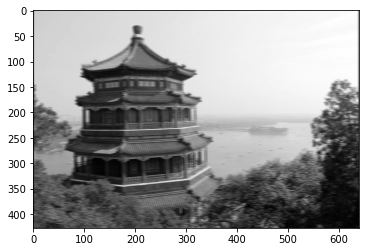

In [3]:
from sklearn.datasets import load_sample_image
# Load sample images 
china = load_sample_image("china.jpg") / 255 
flower = load_sample_image("flower.jpg") / 255

images = np.array([china, flower])
batch_size, height, width, channels = images.shape
# Create 2 filters 
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32) 
filters[:, 3, :, 0] = 1 # vertical line 
filters[3, :, :, 1] = 1 # horizontal line
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map 
plt.show()

In [6]:
#outputs
outputs[0, :, :, 1].shape

TensorShape([427, 640])

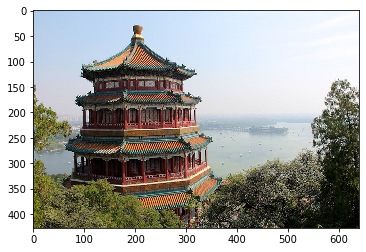

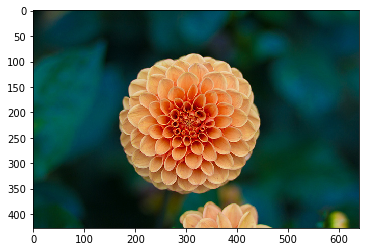

In [4]:
for img in [china, flower]:
  plt.imshow(img, interpolation='nearest')
  plt.show()

In [1]:
output = tf.nn.max_pool(images, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding="VALID")
#output.dtype
#A mini-batch is represented as a 4D tensor of shape [mini- batch size, height, width, channels]
output.shape





NameError: name 'tf' is not defined

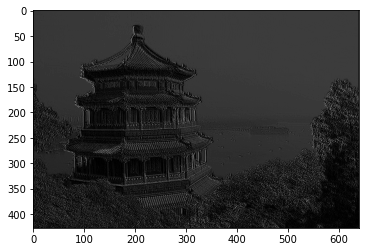

In [30]:
#output
#FEATURE MAP VALJUND, FEATURE MAP korda image
f = 3
kernel_size = (3, 3)
strides = 1
padding = "same"
c = k.layers.Conv2D(f, kernel_size, padding=padding, strides=strides, activation="relu")(output)
plt.imshow(c[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map 
plt.show()



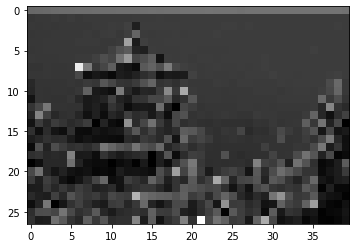

In [38]:
p = tf.keras.layers.MaxPool2D((2, 2), (16, 16))(c)
plt.imshow(p[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map 
p.shape
plt.show()


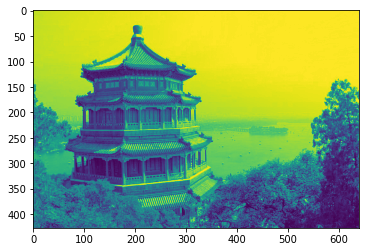

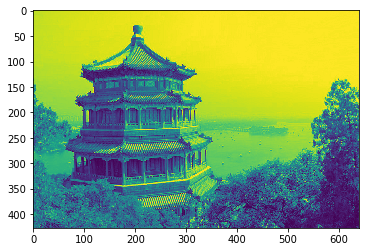

In [10]:
plt.imshow(output[0, :, :, 0])
plt.show()

plt.imshow(output[0, :, :, 0], interpolation='nearest')
plt.show()

#output.shape
#outputs.shape

In [ ]:
from __future__ import print_function
import numpy as np

def valid_imshow_data(data):
    data = np.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False


valid_imshow_data(output[0, :, :, 0])

True